## **Reading Data**

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
# 데이터 세트 로드
mosquitoDF = pd.read_csv('4. dms_seoul_avg.csv')

mosquitoDF

,date,mosquito,temp,rain_per_day,accum_rain,wind,humidity,sunshine
0,2015-04-06,199,12.214286,5.285714,0,3.371429,68.757143,8.880000
1,2015-04-07,146,11.571429,4.928571,0,3.428571,65.742857,9.891429
2,2015-04-08,90,10.914286,4.571429,0,3.257143,63.542857,9.927143
3,2015-04-09,172,10.171429,0.571429,0,2.871429,59.614286,10.884286
4,2015-04-10,249,10.314286,0.071429,0,2.871429,53.485714,12.777143
...,...,...,...,...,...,...,...,...
1168,2020-10-27,535,11.942857,0.000000,0,2.185714,63.242857,12.734286
1169,2020-10-28,884,11.900000,0.000000,0,2.271429,60.771429,14.241429
1170,2020-10-29,695,11.514286,0.000000,0,2.157143,57.100000,14.635714
1171,2020-10-30,543,11.985714,0.000000,0,1.942857,55.871429,14.294286


In [3]:
# pd.to_datetime(mosquitoDF['date'])

## **Setting Target Variable & Seperating Train-Test Set**

In [4]:
# 목표변수 설정
y_target = mosquitoDF['mosquito']
X_data = mosquitoDF.drop(['mosquito'], axis=1)

In [5]:
# Train-Test Set 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=0)

In [6]:
X_train

,date,temp,rain_per_day,accum_rain,wind,humidity,sunshine
1042,2020-06-23,25.614286,0.014286,0,1.957143,58.214286,21.477143
1097,2020-08-17,26.942857,23.771429,0,2.471429,85.914286,9.878571
858,2019-06-23,22.557143,2.028571,0,1.800000,63.100000,19.191429
772,2018-10-15,12.685714,1.000000,0,1.557143,57.485714,13.771429
97,2015-07-12,26.457143,4.214286,29,2.728571,64.685714,14.647143
...,...,...,...,...,...,...,...
1033,2020-06-14,25.600000,1.042857,1,2.157143,62.757143,23.072857
763,2018-10-06,17.200000,13.142857,92,1.900000,64.514286,13.551429
835,2019-05-31,20.400000,1.014286,0,2.228571,51.057143,21.314286
559,2017-09-17,22.114286,3.428571,0,2.442857,55.300000,18.250000


In [7]:
train = pd.concat([X_train, y_train], axis=1)

train.to_csv('(((1))) train.csv', index=False)

## **Standardization**

In [8]:
date = mosquitoDF['date']
mosquitoDF.drop(['date'], axis=1, inplace=True)

date.head()

0    2015-04-06
1    2015-04-07
2    2015-04-08
3    2015-04-09
4    2015-04-10
Name: date, dtype: object

In [9]:
train_date = train['date']
train.drop(['date'], axis=1, inplace=True)
X_train.drop(['date'], axis=1, inplace=True)
test_date = X_test['date']
X_test.drop(['date'], axis=1, inplace=True)

C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
test = pd.concat([X_test, y_test], axis=1)

test.to_csv('(((2))) test.csv', index=False)
X_test.to_csv('(((2))) X_test.csv', index=False)
y_test.to_csv('(((2))) y_test.csv', index=False)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_sc = sc.fit_transform(train)
columns = ['temp', 'rain_per_day', 'accum_rain', 'wind', 'humidity', 'sunshine', 'mosquito']
train_sc = pd.DataFrame(train_sc, columns=columns)

X_train_sc = train_sc.drop(['mosquito'], axis=1)
y_train_sc = train_sc['mosquito']

In [12]:
X_train_sc.head()

,temp,rain_per_day,accum_rain,wind,humidity,sunshine
0,0.825365,-0.641642,-0.350165,-0.405523,-0.496914,1.321576
1,1.105510,2.639964,-0.350165,0.690076,2.227155,-1.352627
2,0.180732,-0.363406,-0.350165,-0.740290,-0.016444,0.794575
3,-1.900771,-0.505484,-0.350165,-1.257656,-0.568563,-0.455078
4,1.003091,-0.061490,0.965651,1.237876,0.139498,-0.253170


In [13]:
y_train_sc.head()

0   -0.376857
1    0.054052
2    0.058380
3   -1.033648
4    0.970962
Name: mosquito, dtype: float64

## **Training LGBM & GBR & RFR**

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [15]:
X_test_sc = pd.read_csv('(((2))) X_test-1.csv')
y_test_sc = pd.read_csv('(((2))) y_test-1.csv')

### 1. LGBM(Light Gradient Boosting Machine)

In [16]:
lgb_reg = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=7,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgb_reg.fit(X_train_sc, y_train_sc)

y_preds_lgb = lgb_reg.predict(X_test_sc)
print('MAE : {:.3f}'.format(mean_absolute_error(y_test_sc, y_preds_lgb)))
print('MSE : {:.3f}'.format(mean_squared_error(y_test_sc, y_preds_lgb)))
print('RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(y_test_sc, y_preds_lgb))))
print('R2 : {:.3f}'.format(r2_score(y_test_sc, y_preds_lgb)))

MAE : 0.427
MSE : 0.402
RMSE : 0.634
R2 : 0.383


In [17]:
y_preds_lgb = pd.DataFrame(y_preds_lgb, columns=['LGBM'])

y_preds_lgb

,LGBM
0,0.164910
1,-0.491594
2,-0.503925
3,1.083738
4,-0.488933
...,...
230,0.220057
231,0.236710
232,-0.548536
233,0.714130


In [18]:
y_preds_lgb.to_csv('[[[1]]] y_preds_lgb.csv', index=False)

### 2. GBR(Gradient Boosting Regressor)

In [19]:
gb_reg = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None,random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False)

gb_reg.fit(X_train_sc, y_train_sc)

y_preds_gb = gb_reg.predict(X_test_sc)
print('MAE : {:.3f}'.format(mean_absolute_error(y_test_sc, y_preds_gb)))
print('MSE : {:.3f}'.format(mean_squared_error(y_test_sc, y_preds_gb)))
print('RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(y_test_sc, y_preds_gb))))
print('R2 : {:.3f}'.format(r2_score(y_test_sc, y_preds_gb)))

MAE : 0.460
MSE : 0.479
RMSE : 0.692
R2 : 0.265


In [20]:
y_preds_gb = pd.DataFrame(y_preds_gb, columns=['GBR'])

y_preds_gb

,GBR
0,0.140400
1,-0.553560
2,-0.553560
3,0.401046
4,-0.152178
...,...
230,-0.349501
231,0.177136
232,-0.508104
233,0.401046


In [21]:
y_preds_gb.to_csv('[[[2]]] y_preds_gb.csv', index=False)

### 3. RFR(Random Forest Regressor)

In [22]:
rf_reg = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

rf_reg.fit(X_train_sc, y_train_sc)

y_preds_rf = rf_reg.predict(X_test_sc)
print('MAE : {:.3f}'.format(mean_absolute_error(y_test_sc, y_preds_rf)))
print('MSE : {:.3f}'.format(mean_squared_error(y_test_sc, y_preds_rf)))
print('RMSE : {:.3f}'.format(np.sqrt(mean_squared_error(y_test_sc, y_preds_rf))))
print('R2 : {:.3f}'.format(r2_score(y_test_sc, y_preds_rf)))

MAE : 0.449
MSE : 0.476
RMSE : 0.690
R2 : 0.270


In [23]:
y_preds_rf = pd.DataFrame(y_preds_rf, columns=['RFR'])

y_preds_rf

,RFR
0,0.243242
1,-0.822553
2,-0.822553
3,0.452054
4,-0.193786
...,...
230,-0.519842
231,0.336082
232,-0.822553
233,0.452054


In [24]:
y_preds_gb.to_csv('[[[3]]] y_preds_rf.csv', index=False)

## **MAE, MSE, RMSE, $R^2$**

In [25]:
print('##### y_test_sc와 y_preds_lgb #####\n\nMAE : {}\nMSE : {}\nRMSE : {}\nR^2 : {}'.format(mean_absolute_error(y_test_sc, y_preds_lgb), mean_squared_error(y_test_sc, y_preds_lgb), np.sqrt(mean_squared_error(y_test_sc, y_preds_lgb)), r2_score(y_test_sc, y_preds_lgb)))

##### y_test_sc와 y_preds_lgb #####

MAE : 0.42704935333858474
MSE : 0.40177995583898884
RMSE : 0.6338611487060781
R^2 : 0.38288188352273345


In [26]:
print('##### y_test_sc와 y_preds_gb #####\n\nMAE : {}\nMSE : {}\nRMSE : {}\nR^2 : {}'.format(mean_absolute_error(y_test_sc, y_preds_gb), mean_squared_error(y_test_sc, y_preds_gb), np.sqrt(mean_squared_error(y_test_sc, y_preds_gb)), r2_score(y_test_sc, y_preds_gb)))

##### y_test_sc와 y_preds_gb #####

MAE : 0.4602009953350944
MSE : 0.4786519998718247
RMSE : 0.6918468037592027
R^2 : 0.26480946519056514


In [27]:
print('##### y_test_sc와 y_preds_rf #####\n\nMAE : {}\nMSE : {}\nRMSE : {}\nR^2 : {}'.format(mean_absolute_error(y_test_sc, y_preds_rf), mean_squared_error(y_test_sc, y_preds_rf), np.sqrt(mean_squared_error(y_test_sc, y_preds_rf)), r2_score(y_test_sc, y_preds_rf)))

##### y_test_sc와 y_preds_rf #####

MAE : 0.44916586495317573
MSE : 0.4755710350903039
RMSE : 0.689616585567882
R^2 : 0.26954170520222687


## **Combining Data**

In [28]:
y_test = pd.concat([test_date, y_test], axis=1)

In [29]:
y_test.to_csv('[[[4]]] y_test.csv', index=False)

In [30]:
combined_data = pd.concat([y_preds_lgb, y_preds_gb, y_preds_rf], axis=1)

combined_data.head()

,LGBM,GBR,RFR
0,0.164910,0.140400,0.243242
1,-0.491594,-0.553560,-0.822553
2,-0.503925,-0.553560,-0.822553
3,1.083738,0.401046,0.452054
4,-0.488933,-0.152178,-0.193786


In [31]:
combined_data.to_csv('[[[5]]] combined_data.csv', index=False)

<span style="color:red">***y_test와 combined_data를 합칠 때 날짜 매칭이 잘 되지 않아서 수동으로 합쳐줘야 합니다...!***</span><br>
<br>
<span style="color:blue">***→ GitHub에 '(6) completed_data.csv'로 올렸어요!***</span>

## **Visualization**

In [32]:
completed_data = pd.read_csv('[[[6]]] completed_data.csv')

completed_data.head()

,date,actual,LGBM,GBR,RFR
0,2019-08-11,-0.393778,0.164910,0.140400,0.243242
1,2019-10-18,-1.040338,-0.491594,-0.553560,-0.822553
2,2017-10-25,-0.882141,-0.503925,-0.553560,-0.822553
3,2016-08-15,2.237321,1.083738,0.401046,0.452054
4,2017-05-06,-0.843182,-0.488933,-0.152178,-0.193786


In [33]:
completed_data.sort_values(by=['date'], inplace=True)

completed_data

,date,actual,LGBM,GBR,RFR
150,2015-04-07,-1.261105,-0.753304,-0.613432,-0.864163
22,2015-04-11,-1.157214,-0.760476,-0.613432,-0.933881
19,2015-04-14,-1.266614,-0.760476,-0.613432,-0.933881
135,2015-04-16,-1.093070,-0.760476,-0.613432,-0.864163
20,2015-04-20,-1.207585,-0.753304,-0.613432,-0.933881
...,...,...,...,...,...
43,2020-09-27,-0.103358,-0.176435,-0.152178,-0.175243
79,2020-10-04,-0.043542,-0.214851,-0.152178,-0.193786
131,2020-10-06,-0.725519,-0.360760,-0.349501,-0.607591
197,2020-10-15,-1.034435,-0.505318,-0.553560,-0.856662


In [34]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'Malgun Gothic'   # 맑은 고딕으로 설정
mpl.rcParams['axes.unicode_minus'] = False

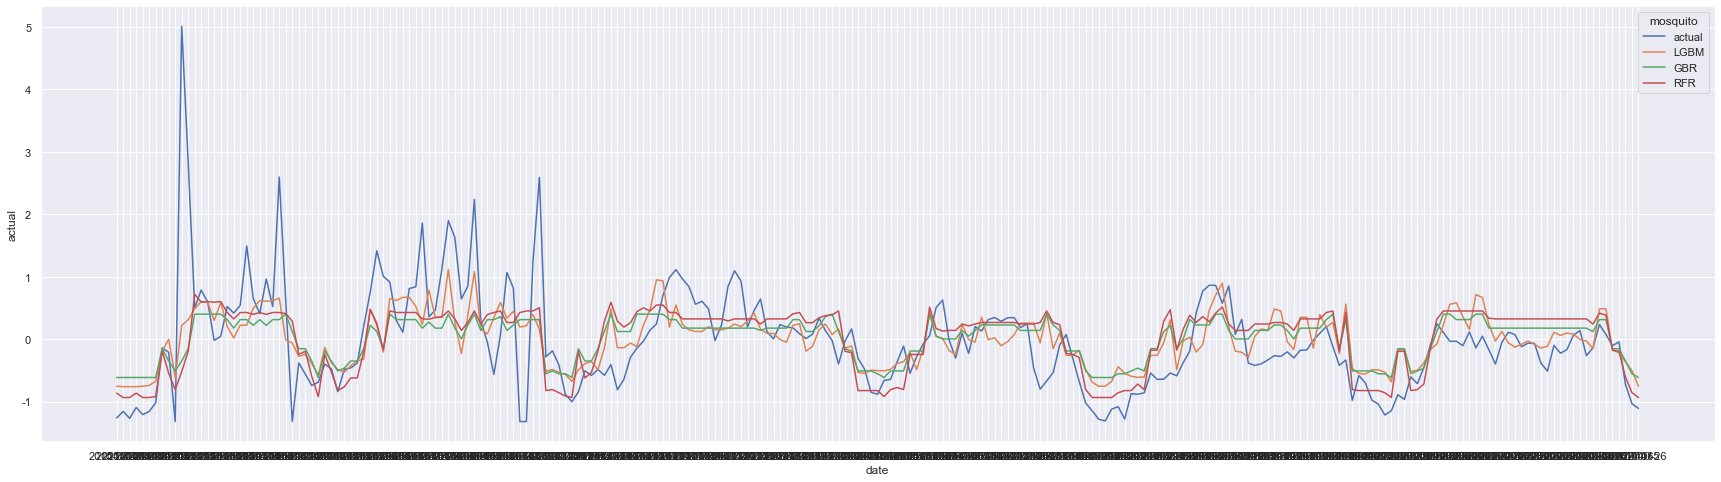

In [35]:
sns.set(rc = {'figure.figsize':(30, 8)})

sns.lineplot(x="date", y="actual", data=completed_data)
sns.lineplot(x="date", y="LGBM", data=completed_data)
sns.lineplot(x="date", y="GBR", data=completed_data)
sns.lineplot(x="date", y="RFR", data=completed_data)
plt.legend(labels=["actual","LGBM", "GBR", "RFR"], title = "mosquito")

plt.show()

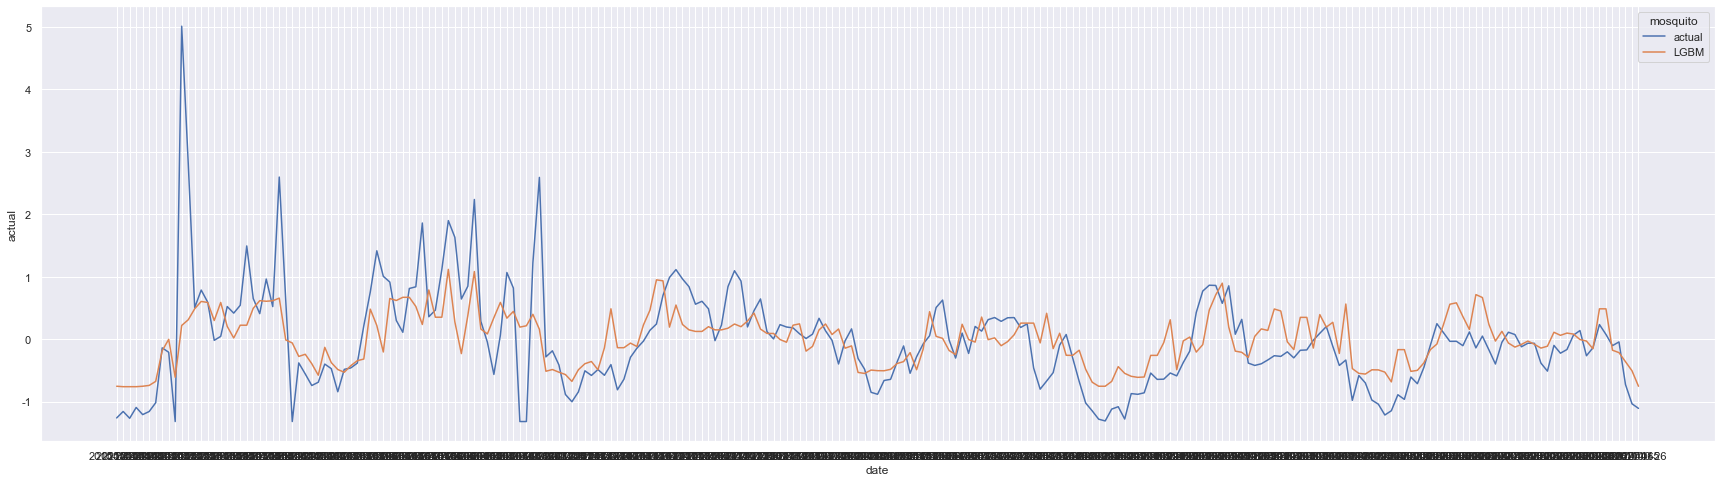

In [36]:
sns.set(rc = {'figure.figsize':(30, 8)})

sns.lineplot(x="date", y="actual", data=completed_data)
sns.lineplot(x="date", y="LGBM", data=completed_data)
plt.legend(labels=["actual","LGBM"], title = "mosquito")

plt.show()